# Santander Customer Transactions Predictions
## Download data from Kaggle

In [ ]:
!kaggle competitions download santander-customer-transaction-prediction -p ../data
!gzip -d -f -S .zip ../data/train.csv.zip
!gzip -d -f -S .zip ../data/test.csv.zip

## Read data

In [25]:
%matplotlib inline
import pandas as pd
comments = ""

In [2]:
train_pd = pd.read_csv('../data/train.csv')
test_pd = pd.read_csv('../data/test.csv')

In [3]:
train_pd.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
test_pd.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


## Random over-sampling

In [5]:
comments = comments + '|Random over-sampling|'

# Class count
count_class_0, count_class_1 = train_pd.target.value_counts()

# Divide by class
train_class_0 = train_pd[train_pd['target'] == 0]
train_class_1 = train_pd[train_pd['target'] == 1]

In [ ]:
count_class_1

In [ ]:
train_class_1_over = train_class_1.sample(count_class_0, replace=True)
train_over_sampled = pd.concat([train_class_0, train_class_1_over], axis=0)

In [ ]:
print('Random over-sampling:')
print(train_over_sampled.target.value_counts())

train_over_sampled.target.value_counts().plot(kind='bar', title='Count (target)');

### Prepare the dataset to training

In [ ]:
train_X = train_over_sampled.drop(labels=['ID_code','target'], axis=1)
train_Y = train_over_sampled.target

In [ ]:
test_X = test_pd.drop(labels=['ID_code'], axis = 1)

## Random under-sampling

In [26]:
comments = comments + '|Random under-sampling|'

# Class count
count_class_0, count_class_1 = train_pd.target.value_counts()

# Divide by class
train_class_0 = train_pd[train_pd['target'] == 0]
train_class_1 = train_pd[train_pd['target'] == 1]

In [27]:
train_class_0_under = train_class_0.sample(count_class_1)
train_under_sampled = pd.concat([train_class_0_under, train_class_1], axis=0)

Random under-sampling:
1    20098
0    20098
Name: target, dtype: int64


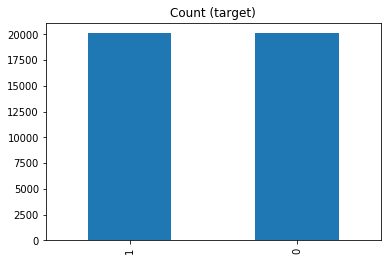

In [28]:
print('Random under-sampling:')
print(train_under_sampled.target.value_counts())

train_under_sampled.target.value_counts().plot(kind='bar', title='Count (target)');

### Prepare the dataset to training

In [29]:
train_X = train_under_sampled.drop(labels=['ID_code','target'], axis=1)
train_Y = train_under_sampled.target

In [30]:
test_X = test_pd.drop(labels=['ID_code'], axis = 1)

## Train the model

In [31]:
import sklearn as sk

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
comments = comments + "|RandomForestClassifier class_weigth=None"
model = RandomForestClassifier(class_weight=None)

In [34]:
model.fit(train_X, train_Y)

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
test_Y = pd.DataFrame(model.predict(test_X), columns=['target'])

In [36]:
test_Y.head()

,target
0,1
1,1
2,1
3,0
4,1


## Results preparation

In [37]:
results = pd.concat([test_pd['ID_code'], test_Y], axis= 1)

In [38]:
file_name = '../data/submission_RandomForest.csv'

In [39]:
results.to_csv(file_name, index= False)

## Submit results

In [40]:
!kaggle competitions submit -c santander-customer-transaction-prediction -f "$file_name" -m "$comments"

100%|######################################| 2.56M/2.56M [00:02<00:00, 1.17MB/s]
Successfully submitted to Santander Customer Transaction Prediction

In [42]:
!kaggle competitions submissions santander-customer-transaction-prediction

fileName                     date                 description                                                                                                    status    publicScore  privateScore  
---------------------------  -------------------  -------------------------------------------------------------------------------------------------------------  --------  -----------  ------------  
submission_RandomForest.csv  2019-02-26 21:27:58  |Random over-sampling||Random under-sampling||RandomForestClassifier class_weigth=None                         complete  0.645        None          
submission_RandomForest.csv  2019-02-26 21:16:35  RandomForest submission 1|RandomForestClassifier class_weigth='None'|RandomForestClassifier class_weigth=None  complete  0.508        None          
submission_RandomForest.csv  2019-02-26 21:12:18  RandomForest submission 1                                                                                      complete  0.506        None          
submi